Two-body approximation

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
R_earth = 6371302 # in m
mu_earth = 398600.4415e+9
omega_earth = 7.29211e-5

широта (lat) - угол между r и xOy и по  z  определяем знак
долгота (long) - угол между r и xOz  по z определяем 360-fi

In [255]:
def angle_between(v1,v2):
    return np.arccos(np.clip(np.dot(v1 / np.linalg.norm(v1), v2 / np.linalg.norm(v2)), -1.0, 1.0))

def getProjection(y):
    #print(y)
    lat = (np.pi / 2 - angle_between(y[:3], np.array([0,0,1])))
    long = angle_between(y[:2], np.array([1,0]))*(np.sign(y[1]) if y[1]!=0 else 1)
    return np.append(lat,long)

In [168]:
angle_between(np.array([0,0,1]), np.array([0,1,0]))*180/np.pi

np.float64(90.0)

In [256]:
# [x y z vx vy vz] -> [lat, long]

print(getProjection(np.array([0,1,0,0,0,0]))*180/np.pi)
print(getProjection(np.array([0,0,1,0,0,0]))*180/np.pi)
print(getProjection(np.array([0,1,1,0,0,0]))*180/np.pi)
print(getProjection(np.array([1,1,0,0,0,0]))*180/np.pi)
print(getProjection(np.array([-0.4,0,0,0,0,0]))*180/np.pi)


[ 0. 90.]
[90. nan]
[45. 90.]
[ 0. 45.]
[  0. 180.]


/var/folders/k_/clwcs1zs1wxbpjn827kqbqc40000gn/T/ipykernel_23925/1109198627.py:2: RuntimeWarning: invalid value encountered in divide
  return np.arccos(np.clip(np.dot(v1 / np.linalg.norm(v1), v2 / np.linalg.norm(v2)), -1.0, 1.0))


In [165]:
# y is considered horizontal matrix
def dydt(t,y_curr: np.array, p):
    # gravity center is at (0,0,0)
    # a = mu / r**2
    grav_pos = np.array([0,0,0])
    
    r = y_curr[:3]
    a = -p['mu'] / np.sqrt(np.sum(r**2)) ** 3 * r
    #print(y_curr[:3], a)
    return np.append(y_curr[3:], a)

In [248]:
y_0 = np.array([R_earth, 0, 0, 0, (mu_earth / R_earth)**0.5, 0])
p={'mu': mu_earth, 'i': np.pi / 4}

Rot_x = np.array([[1,0,0],
                      [0, np.cos(p['i']), -np.sin(p['i'])],
                      [0, np.sin(p['i']), np.cos(p['i'])]])

y_rot = np.append(y_0[:3], np.transpose(Rot_x @ np.transpose(y_0[3:])))
sol=solve_ivp(lambda t,y: dydt(t,y,p), [0,6000],y_rot, method="RK45",t_eval=np.arange(0,6000,6), rtol=1e-6)

In [193]:
np.sign(0)

np.int64(0)

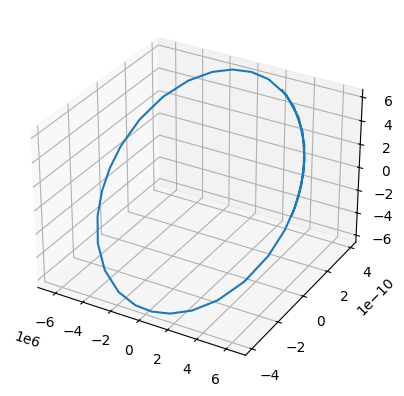

In [72]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot(sol.y[0],sol.y[1],sol.y[2])

In [155]:
np.transpose(sol.y)

array([[ 6.37130200e+06,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  4.84323618e-13,  7.90960494e+03],
       [ 6.37130200e+06,  8.65900589e-17,  1.41412298e+00,
        -1.75555233e-03,  4.84323618e-13,  7.90960494e+03],
       [ 6.37130200e+06,  9.52490648e-16,  1.55553528e+01,
        -1.93110756e-02,  4.84323618e-13,  7.90960494e+03],
       [ 6.37130200e+06,  9.61149654e-15,  1.56967650e+02,
        -1.94866309e-01,  4.84323618e-13,  7.90960493e+03],
       [ 6.37130181e+06,  9.62015544e-14,  1.57109061e+03,
        -1.95041862e+00,  4.84323604e-13,  7.90960469e+03],
       [ 6.37128263e+06,  9.62101169e-13,  1.57123045e+04,
        -1.95059222e+01,  4.84322146e-13,  7.90958088e+03],
       [ 6.36936465e+06,  9.62013284e-12,  1.57108692e+05,
        -1.95041404e+02,  4.84176348e-13,  7.90719983e+03],
       [ 6.29294448e+06,  6.09973237e-11,  9.96161892e+05,
        -1.23667777e+03,  4.78367164e-13,  7.81232866e+03],
       [ 5.98578256e+06,  1.33647786e-10,  2.182

np.float64(338.4309415057479)

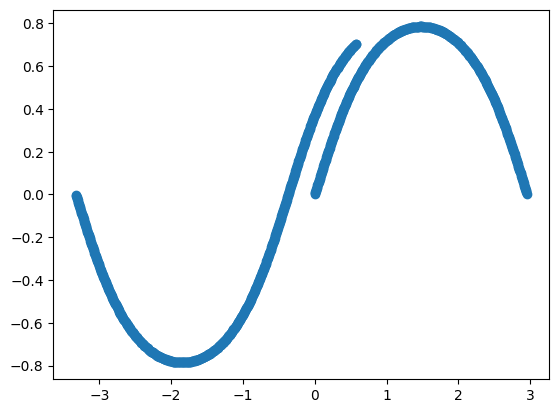

In [258]:
crd=np.array(list(map(getProjection,(np.transpose(sol.y))))).transpose()
crd[1]-=sol.t*omega_earth
plt.scatter(crd[1],crd[0])
np.max(crd[1])*360/np.pi

In [162]:
y_kep = keplerian_based(sol.y, np.pi / 2)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot(y_kep[0], y_kep[1], y_kep[2])

(6, 40)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 6 is different from 3)